[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dariush-bahrami/An-Observation-on-Distribution-of-Prime-Numbers/blob/master/Jupyter%20Notebooks/Paper%20-%20Figure%206%20-%20Required%20Deltas%20to%20Cover%20More%20Primes.ipynb)

In [2]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir = Path('data')
delta_frequency_path = Path.joinpath(data_dir, Path('delta_frequency_under_1b.csv'))

In [4]:
try:
    df = pd.read_csv(delta_frequency_path)
except FileNotFoundError as error:
        print(error)
        in_colab = 'google.colab' in sys.modules
        if in_colab:
            print('running on colab, downloading data to session...')
            !mkdir data
            # Download delta_frequency_under_1b.csv
            !wget https://bit.ly/3zcycOz -O data/delta_frequency_under_1b.csv
        else:
            print('Please download required data from paper repo')

In [5]:
df.head(4)

,delta,delta_log2,frequency,density,cumulative_density
0,2,1.000000,2047829,0.040274,0.040274
1,1/2,-1.000000,2046288,0.040244,0.080518
2,3/2,0.584963,1460663,0.028726,0.109244
3,2/3,-0.584963,1460572,0.028725,0.137968


In [6]:
total_deltas_quantity = len(df.index)
data = {'Primes Coverage (%)': np.linspace(1, 99.99999, 1000),
        'Required Deltas Quantity': [],
        'Required Deltas (%)': []}
for p in data['Primes Coverage (%)']:
    quantity = len(df[df['cumulative_density']<(p/100)].index)
    data['Required Deltas Quantity'].append(quantity)
    data['Required Deltas (%)'].append((quantity/total_deltas_quantity)*100)
data_df = pd.DataFrame(data)

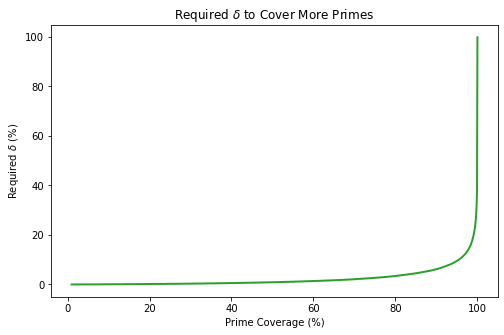

In [7]:
tab_linecolors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange', 'tab:purple']
figsize = (8, 5)
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(*figsize)
x, y = data_df['Primes Coverage (%)'], data_df['Required Deltas (%)']
ax.plot(x, y, linewidth=2, color=tab_linecolors[0])
ax.set_title('Required $\delta$ to Cover More Primes')
ax.set_xlabel('Prime Coverage (%)')
ax.set_xscale('linear')
ax.set_ylabel('Required $\delta$ (%)')
ax.set_yscale('linear')
plt.show()